<a href="https://colab.research.google.com/github/ekaratnida/Data_Streaming_and_Realtime_Analytics/blob/main/Week12/StreamClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install river

     |████████████████████████████████| 2.0 MB 26.8 MB/s 


In [2]:
!pip install -U numpy

# 1. Clustream

In [3]:
from river import cluster
from river import stream

X = [
     [1, 2],
     [1, 4],
     [1, 0],
     [4, 2],
     [4, 4],
     [4, 0]
]

clustream = cluster.CluStream( time_window=1,
                               max_micro_clusters=3,
                               n_macro_clusters=2,
                               seed=0,
                               halflife=0.4)

for i, (x, _) in enumerate(stream.iter_array(X)):
  clustream = clustream.learn_one(x)

ans1 = clustream.predict_one({0: 1, 1: 1})
print(ans1)
ans2 = clustream.predict_one({0: 4, 1: 3})
print(ans2)
ans3 = clustream.predict_one({0: 1, 1: 3})
print(ans3)

1
0
1


#2. Denstream

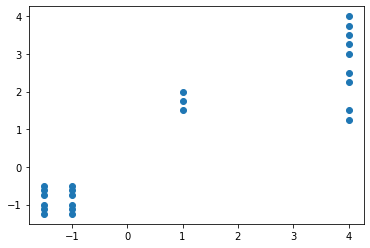

1
0
2
Num of clusters =  3
{0: <river.cluster.denstream.DenStreamMicroCluster object at 0x7fb01f543d50>, 1: <river.cluster.denstream.DenStreamMicroCluster object at 0x7fb01f543290>, 2: <river.cluster.denstream.DenStreamMicroCluster object at 0x7fb01f543690>}


In [37]:
from river import cluster
from river import stream
import matplotlib.pyplot as plt
import numpy as np

X = [
     [-1, -0.5], [-1, -0.625], [-1, -0.75], [-1, -1], [-1, -1.125], [-1, -1.25],
     [-1.5, -0.5], [-1.5, -0.625], [-1.5, -0.75], [-1.5, -1], [-1.5, -1.125], [-1.5, -1.25],
     [1, 1.5], [1, 1.75], [1, 2], [4, 1.25], [4, 1.5], [4, 2.25],
     [4, 2.5], [4, 3], [4, 3.25], [4, 3.5], [4, 3.75], [4, 4],
]

aX = np.array(X)
#print(aX)
plt.scatter(aX[:,0],aX[:,1])
plt.show()

denstream = cluster.DenStream(decaying_factor = 0.01, beta = 1.01, mu = 1.0005, epsilon = 0.5, n_samples_init=10)

for x, _ in stream.iter_array(X):
  denstream = denstream.learn_one(x)

result1 = denstream.predict_one({0: -1, 1: -2})
print(result1)
result2 = denstream.predict_one({0:5, 1:4})
print(result2)
result3 = denstream.predict_one({0:1, 1:1})
print(result3)

result4 = denstream.n_clusters
print("Num of clusters = ",result4)

print(denstream.p_micro_clusters)

# Dataset
https://github.com/ekaratnida/Applied-machine-learning/blob/master/Week14-kmeans/Mall_Customers.csv

#Stream K-Means

In [ ]:
from river import cluster
from river import stream

X = [
     [1, 0.5], [1, 0.625], [1, 0.75], [1, 1.125], [1, 1.5], [1, 1.75],
     [4, 1.5], [4, 2.25], [4, 2.5], [4, 3], [4, 3.25], [4, 3.5]
]

streamkmeans = cluster.STREAMKMeans(chunk_size=3, n_clusters=2, halflife=0.5, sigma=1.5, seed=0)

for x, _ in stream.iter_array(X):
  streamkmeans = streamkmeans.learn_one(x)

print(streamkmeans.predict_one({0:1, 1:0}))
print(streamkmeans.predict_one({0:5, 1:2}))
